# ML-Exercise 2

This notebook contains the second exercise of the Machine Learning for Visual Computing (183.605) lecture at TU Wien. Assignment via TUWEL. Please be aware of the deadlines in TUWEL.

* Upload a zip-file with the required programms. The programming language is python.
    1. Gaussian Process --> `solutions/gaussian_process.py`
    3. Vision Transformer --> `solutions/vision_transformer.py`
* If you needed additional conda or pip packages add an anaconda environment.yml to the zip-file
    1. conda env export > environment.yml
    2. See --> https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#sharing-an-environment

Important Note: In order to run the code error free, you need to install Latex locally. Alternatively, you can use JupyterHub, accessible via the TUWEL page.

##### Conda instructions

1. conda create --name MLVC-2
4. conda activate MLVC-2
5. conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia
6. python -m pip install pillow matplotlib tqdm torchinfo ipykernel ipywidgets scikit-learn seaborn einops

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import rcParams
from util.gaussian_process_util import (
    plot_gp_results,
    plot_mvn,
    plot_new_visualization,
    plot_conditioned_new_visualization,
    plot_kernels,
    generate_noisy_points,
)
from solution_G_X.gaussian_process import (
    MultivariateNormal,
    GaussianProcess,
    sample_points,
)
import seaborn as sns

# You might need to set the path such that the latex executable can be found
# os.environ["PATH"] += os.pathsep + "/usr/local/bin"

rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
rcParams["text.usetex"] = True
np.set_printoptions(suppress=True)
# Set matplotlib and seaborn plotting style
sns.set_style("darkgrid")
np.random.seed(42)

%load_ext autoreload
%autoreload 2

# Imports
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Gaussian Process

### Multivariate Normal Distribution

In [ ]:
mean = [0, 0]

x = np.linspace(-2, 2, 81)
y = np.linspace(-2, 2, 81)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(15, 6))
subfigs = fig.subfigures(1, 3, wspace=0.01)

axis_left = subfigs[0].subplots()
axis_mid = subfigs[1].subplots()
axis_right = subfigs[2].subplots()

cov = np.array([[1, 0], [0, 1]])
distr = MultivariateNormal(cov=cov, mean=mean, seed=1000)
plot_mvn(axis_left, mean, cov, distr)

cov = np.array([[1, 0.5], [0.5, 1]])
distr = MultivariateNormal(cov=cov, mean=mean, seed=1000)
plot_mvn(axis_mid, mean, cov, distr)

cov = np.array([[1, 0.9], [0.9, 1]])
distr = MultivariateNormal(cov=cov, mean=mean, seed=1000)
plot_mvn(axis_right, mean, cov, distr)

plt.tight_layout()
plt.show()

<div style="background-color:rgba(255, 255, 255, 1); text-align:center; vertical-align: middle; padding:40px 0;">

#### <span style="color:blue"> Example.</span>

![h](img/3_multivariate_distributions.svg)


### New Visualization (with independent gaussians)

Randomly sample 50 points from the independent multivariate normal distribution and plot one of them using the new visualization technique. The selected point is plotted in blue.

In [ ]:
mean = [0, 0]
cov = np.array([[1, 0], [0, 1]])

distr = MultivariateNormal(cov=cov, mean=mean, seed=1000)
x = np.linspace(-3 * cov[0, 0], 3 * cov[0, 0], num=200)
y = np.linspace(-3 * cov[1, 1], 3 * cov[1, 1], num=200)
X, Y = np.meshgrid(x, y)

# Generating the density function
# for each point in the meshgrid
pdf = distr.pdf(X, Y)

fig = plt.figure(figsize=(12, 6))
subfigs = fig.subfigures(1, 2, wspace=0.01)

axis_left = subfigs[0].subplots()
axis_right = subfigs[1].subplots()

sampled_points = sample_points(mean, cov, n=50)

plot_mvn(axis_left, mean, cov, distr, sampled_points=sampled_points)
plot_new_visualization(axis_right, sampled_points)
plt.show()

<div style="background-color:rgba(255, 255, 255, 1); text-align:center; vertical-align: middle; padding:40px 0;">

#### <span style="color:blue"> Example.</span>

![h](img/new_viz_independent.svg)

### New Visualization (with dependent gaussians)

Randomly sample 50 points from the dependent multivariate normal distribution and plot one of them using the new visualization technique. The selected point is plotted in blue.

In [ ]:
mean = [0, 0]
cov = np.array([[1, 0.9], [0.9, 1]])

distr = MultivariateNormal(cov=cov, mean=mean, seed=1000)
x = np.linspace(-3 * cov[0, 0], 3 * cov[0, 0], num=200)
y = np.linspace(-3 * cov[1, 1], 3 * cov[1, 1], num=200)
X, Y = np.meshgrid(x, y)

# Generating the density function
# for each point in the meshgrid
pdf = distr.pdf(X, Y)

fig = plt.figure(figsize=(12, 6))
subfigs = fig.subfigures(1, 2, wspace=0.01)

axis_left = subfigs[0].subplots()
axis_right = subfigs[1].subplots()

sampled_points = sample_points(mean, cov, n=50)

plot_mvn(axis_left, mean, cov, distr, sampled_points=sampled_points)
plot_new_visualization(axis_right, sampled_points)
plt.show()

<div style="background-color:rgba(255, 255, 255, 1); text-align:center; vertical-align: middle; padding:40px 0;">

#### <span style="color:blue"> Example.</span>

![h](img/new_viz_dependent.svg)

### Conditioned Gaussian

In [ ]:
mean = [0, 0]
cov = np.array([[1, 0.9], [0.9, 1]])

distr = MultivariateNormal(cov=cov, mean=mean, seed=1000)
x = np.linspace(-3 * cov[0, 0], 3 * cov[0, 0], num=601)
y = np.linspace(-3 * cov[1, 1], 3 * cov[1, 1], num=601)
X, Y = np.meshgrid(x, y)

# Generating the density function
# for each point in the meshgrid
pdf = distr.pdf(X, Y)

fig = plt.figure(figsize=(16, 6))
subfigs = fig.subfigures(1, 3, wspace=0.01)

axis_left = subfigs[0].subplots()
axis_mid = subfigs[1].subplots()
axis_right = subfigs[2].subplots()

sampled_points = sample_points(mean, cov, n=50, observation=1.2)

plot_mvn(axis_left, mean, cov, distr, sampled_points=sampled_points, conditioned=True)
plot_conditioned_new_visualization(axis_mid, axis_right, sampled_points, pdf, X, y)

plt.show()

<div style="background-color:rgba(255, 255, 255, 1); text-align:center; vertical-align: middle; padding:40px 0;">

#### <span style="color:blue"> Example.</span>

![h](img/conditioned_gaussian.svg)

### Complete Gaussian Process

A Gaussian process is defined as a collection of random variables, any finite number of which have a joint Gaussian distribution. A GP is fully specified by its mean function $m(\mathbf{x})$ and covariance function (kernel) $k(\mathbf{x}, \mathbf{x'})$:

$
\begin{align}
f(\mathbf{x}) \sim \mathcal{GP}(m(\mathbf{x}), k(\mathbf{x}, \mathbf{x'})) 
\end{align}
$

#### Kernel Functions

The choice of kernel determines the smoothness and behavior of the GP. Common kernels include the Radial Basis Function (RBF), the Gaussian kernel or the Exponential Sinine kernel. The RBF kernel is defined as:

$
\begin{align}
k(\mathbf{x}, \mathbf{x'}) = \exp(-\frac{d(\mathbf{x}, \mathbf{x'})^2}{2l^2})
\end{align}
$

where $l$ is the lengthscale parameter and $d(\cdot, \cdot)$ is the Euclidean distance. The Exponential Sine kernel is defined as:

$
\begin{align}
k(\mathbf{x}, \mathbf{x'}) = \exp(-\frac{2\sin^2(\pi d(\mathbf{x}, \mathbf{x'}))}{l^2})
\end{align}
$

where $l$ is the lengthscale parameter and $d(\cdot, \cdot)$ is the Euclidean distance and $p$ is the periodicity of the kernel.

#### Training

Training involves optimizing the hyperparameters (e.g., lengthscale, noise variance, periodicity) to maximize the likelihood of the observed data under the GP. In this example these values are given, however, in the next example you will use the negative log marginal likelihood to optimize the hyperparameters. We assume the mean function is zero.


In [ ]:
kernel = "Sine"  # Default: "Sine", but "RBF" or "Sine+RBF" are also valid options
n1 = 10  # Number of points to condition on (training points)
n2 = 1000  # Number of points in posterior (test points)
ny = 5  # Number of functions that will be sampled from the posterior
domain = (0, 10)  # Domain bounds
noise = 0.4  # Noise of the data


# Define the true function that we want to regress on
def f_sin(x):
    return (np.sin(x * 3) * 2).flatten()


# Sample observations (X1, y1) on the function
Xtrain, t_train = generate_noisy_points(n1, noise, f_sin, domain, seed=27)
# Predict points at uniform spacing to capture function
Xtest = np.linspace(domain[0], domain[1], n2).reshape(-1, 1)

gp = GaussianProcess(length_scale=0.3, noise=noise, kernel=kernel, periodicity=2)
gp.fit(Xtrain, t_train, meta_parameter_search=False)
# Compute posterior mean and covariance
pred_distribution = gp.predict(Xtest)

(
    mean_pred_distribution,
    std_pred_distribution,
    conv_pred_distribution,
) = pred_distribution

# Draw some samples of the posterior
ytest_pred = np.random.multivariate_normal(
    mean=mean_pred_distribution, cov=conv_pred_distribution, size=ny
)

plot_gp_results(f_sin, Xtrain, Xtest, t_train, ytest_pred, domain, pred_distribution)

plot_kernels(Xtrain, Xtest, gp.kernel)

<div style="background-color:rgba(255, 255, 255, 1); text-align:center; vertical-align: middle; padding:40px 0;">

#### <span style="color:blue"> Example.</span>

![h](img/cov.svg)

#### <span style="color:blue"> Predictions Gaussian Process.</span>.
![h](img/gp_output.svg)

### Complete Gaussian Process with negative log likelihood

Optimal values for the kernel parameters can be estimated by maximizing the log marginal likelihood which is given by:
$
\begin{align}
log p(t|X) = log \mathcal{N}(t|0,K_y) = -\frac{1}{2}t^TK_{t}^{-1}t-\frac{1}{2}log|K_t|-\frac{N}{2}log(2\pi)
\end{align}
$

In the following we will minimize the negative log marginal likelihood w.r.t. parameters $l$ and $σ_f$, $σ_y$ is set to the known noise level of the data. If the noise level is unknown, $σ_y$ can be estimated as well along with the other parameters. However, in this exercise the noise level is given. You may use a numerical optimization method of your choice (we recommend scipy.optimize and scipy.linalg: cho_solve, cholesky, solve_triangular).

In [ ]:
kernel = "Sine"  # Default: "Sine", but "RBF" or "Sine+RBF" are also valid options
n1 = 10  # Number of points to condition on (training points)
n2 = 1000  # Number of points in posterior (test points)
ny = 5  # Number of functions that will be sampled from the posterior
domain = (0, 10)  # Domain bounds
noise = 0.4  # Noise of the data


# Define the true function that we want to regress on
def f_sin(x):
    return (np.sin(x * 3) * 2).flatten()


# Sample observations (X1, y1) on the function
Xtrain, t_train = generate_noisy_points(n1, noise, f_sin, domain, seed=27)
# Predict points at uniform spacing to capture function
Xtest = np.linspace(domain[0], domain[1], n2).reshape(-1, 1)

gp = GaussianProcess(length_scale=0.3, noise=noise, kernel=kernel, periodicity=2)
# to predict only based on the prior, comment the fit call
gp.fit(Xtrain, t_train, meta_parameter_search=True)
# Compute posterior mean and covariance
pred_distribution = gp.predict(Xtest)

(
    mean_pred_distribution,
    std_pred_distribution,
    conv_pred_distribution,
) = pred_distribution

# Draw some samples of the posterior
ytest_pred = np.random.multivariate_normal(
    mean=mean_pred_distribution, cov=conv_pred_distribution, size=ny
)
plot_gp_results(f_sin, Xtrain, Xtest, t_train, ytest_pred, domain, pred_distribution)

plot_kernels(Xtrain, Xtest, gp.kernel)

<div style="background-color:rgba(255, 255, 255, 1); text-align:center; vertical-align: middle; padding:40px 0;">

#### <span style="color:blue"> Example.</span>

![h](img/cov_nll.svg)

#### <span style="color:blue"> Predictions Gaussian Process.</span>.
![h](img/gp_output_nll.svg)

## Convert Dataset to PyTorch

In this section we first define some parameters like the number of training samples or the image size. Do the general imports and then we load the dataset and convert it to a PyTorch dataset.

In [21]:
NUM_SAMPLES = 10000  # Recommended: 10.000
TEST_RATIO = 0.2  # Recommended: 0.2
BATCH_SIZE = 64  # Recommended: 64
IMAGE_SIZE = 32  # Recommended: 32 (but you can also try 16, 64 or 128, depending on your hardware)
GET_ACCURACY_PER_EPOCH = False  # Recommended: False (takes a lot of time)


In [22]:
from tqdm import trange
import torch.optim as optim
from torchinfo import summary
from torch import nn
import torch
from torch.utils import data
import matplotlib.pyplot as plt
import numpy as np

from util.generate_dataset import make_dataset
from util.attention_visualizer import Visualizer
from solution_G_X.vision_transformer import VisionTransformer
from util.vision_transformer_util import CircleSquareDataset


(2000, 1024) (2000,) (8000, 1024) (8000,)


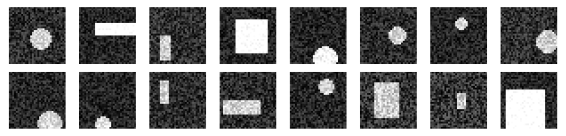

In [23]:
(dataset_train, labels_train), (dataset_test, labels_test) = make_dataset(
    NUM_SAMPLES, TEST_RATIO, IMAGE_SIZE
)

print(dataset_train.shape, labels_train.shape, dataset_test.shape, labels_test.shape)

dataset_pytorch_train = CircleSquareDataset(
    dataset_train, labels_train, image_size=IMAGE_SIZE
)
dataset_pytorch_test = CircleSquareDataset(
    dataset_test, labels_test, image_size=IMAGE_SIZE
)

train_dataloader = data.DataLoader(
    dataset_pytorch_train, shuffle=True, batch_size=BATCH_SIZE
)

test_dataloader = data.DataLoader(dataset_pytorch_test, shuffle=True, batch_size=1)

fig, axs = plt.subplots(2, 8, figsize=(8, 2), dpi=200)
axs = axs.reshape(-1)
for i, (x, y) in enumerate(train_dataloader):
    axs[i].imshow(x[0].sum(dim=0).reshape((IMAGE_SIZE, IMAGE_SIZE)), cmap="gray")
    axs[i].axis('off')

    if i == 15:
        break
plt.tight_layout()
plt.show()

## Transformer (Encoder - Decoder)

Layer (type:depth-idx)                   Output Shape              Param #
VisionTransformer                        [64, 1]                   1,056
├─PatchEmbed: 1-1                        [64, 64, 16]              --
│    └─Conv2d: 2-1                       [64, 16, 8, 8]            784
├─ModuleList: 1-2                        --                        --
│    └─Block: 2-2                        [64, 65, 16]              --
│    │    └─LayerNorm: 3-1               [64, 65, 16]              32
│    │    └─Attention: 3-2               [64, 65, 16]              1,040
│    │    └─LayerNorm: 3-3               [64, 65, 16]              32
│    │    └─Mlp: 3-4                     [64, 65, 16]              2,128
│    └─Block: 2-3                        [64, 65, 16]              --
│    │    └─LayerNorm: 3-5               [64, 65, 16]              32
│    │    └─Attention: 3-6               [64, 65, 16]              1,040
│    │    └─LayerNorm: 3-7               [64, 65, 16]              32
│ 

100%|██████████| 100/100 [00:22<00:00,  4.41it/s]


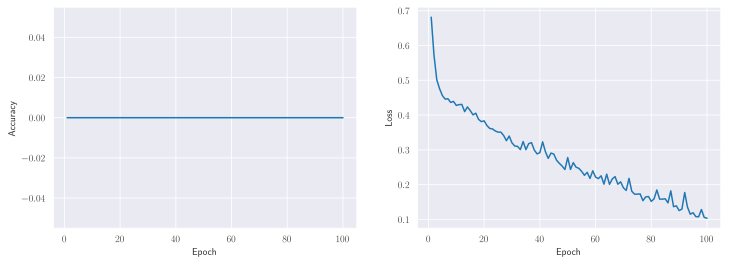

In [24]:
# We check if a GPU is available and use it. To force CPU set: device = "cpu"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transf = VisionTransformer(
    image_size=IMAGE_SIZE,
    patch_size=4,
    num_classes=1,  # We don't predict classes
    dim=16,
    depth=2,
    heads=4,
    mlp_dim=64,
    dropout=0.0
)

# Convert transformer to selected device
transf = transf.to(device)

transf.train()

print(summary(transf, input_size=(BATCH_SIZE, 3, IMAGE_SIZE, IMAGE_SIZE)))

criterion = nn.BCELoss()
optimizer = optim.AdamW(transf.parameters(), lr=0.001)
loss_per_epoch = []
acc_per_epoch = []
for epoch in trange(100):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, (data_, label_) in enumerate(train_dataloader, 0):
        # Convert data and label (target in lecture) to selected device
        data_ = data_.to(device)
        label_ = label_.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = transf(data_).squeeze()

        loss = criterion(outputs, label_)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    if GET_ACCURACY_PER_EPOCH:
        transf.eval()
        data_frame, acc = transf.predict(test_dataloader, device)
        transf.train()
        acc_per_epoch.append(acc)
    else:
        acc_per_epoch.append(0)

    loss_per_epoch.append(running_loss / len(train_dataloader))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(np.arange(len(acc_per_epoch)) + 1, acc_per_epoch)
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epoch")

ax[1].plot(np.arange(len(loss_per_epoch)) + 1, loss_per_epoch)
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epoch")

plt.show()

<div style="background-color:rgba(255, 255, 255, 1); text-align:center; vertical-align: middle; padding:40px 0;">

#### <span style="color:blue"> Potential transformer accuracy and loss.</span>
![h](img/transformer_loss.svg)

In [25]:
transf.eval()
data_frame, acc = transf.predict(test_dataloader, device)
print(data_frame[0:20])
print("Test ACC:", acc)


     class  Pred  RAW_Pred  GT    Correct?
0   Circle     0     0.004   0  ✔
1   Square     1     0.518   1  ✔
2   Square     1     0.982   1  ✔
3   Square     1     0.992   1  ✔
4   Square     1     0.952   1  ✔
5   Square     1     0.998   1  ✔
6   Square     1     0.885   1  ✔
7   Square     1     0.998   1  ✔
8   Square     1     0.999   1  ✔
9   Circle     0     0.004   0  ✔
10  Square     1     0.995   1  ✔
11  Circle     0     0.004   0  ✔
12  Square     1     0.998   1  ✔
13  Square     1     0.998   1  ✔
14  Circle     0     0.019   1  ✖
15  Square     1     0.637   1  ✔
16  Square     1     0.998   1  ✔
17  Circle     0     0.003   0  ✔
18  Square     1     0.979   1  ✔
19  Circle     0     0.004   0  ✔
Test ACC: 0.843125


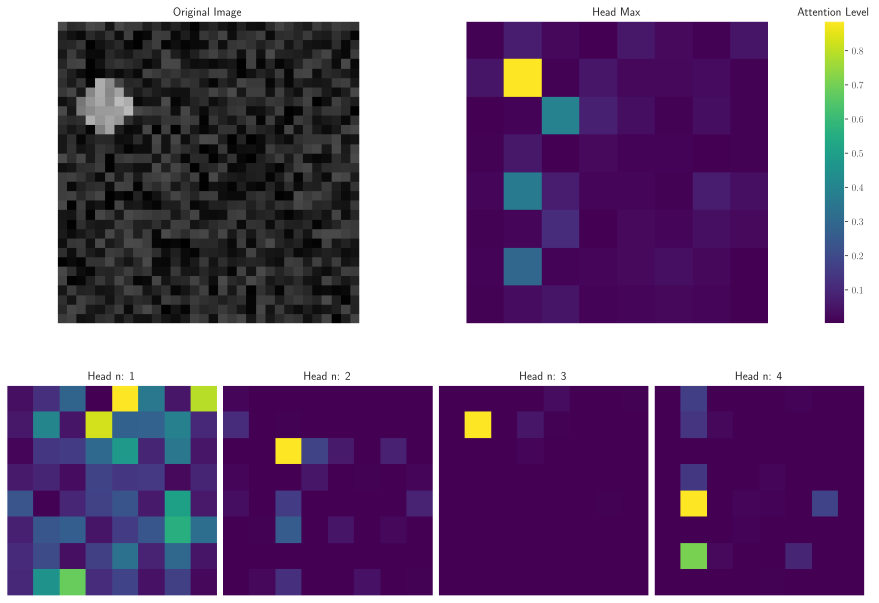

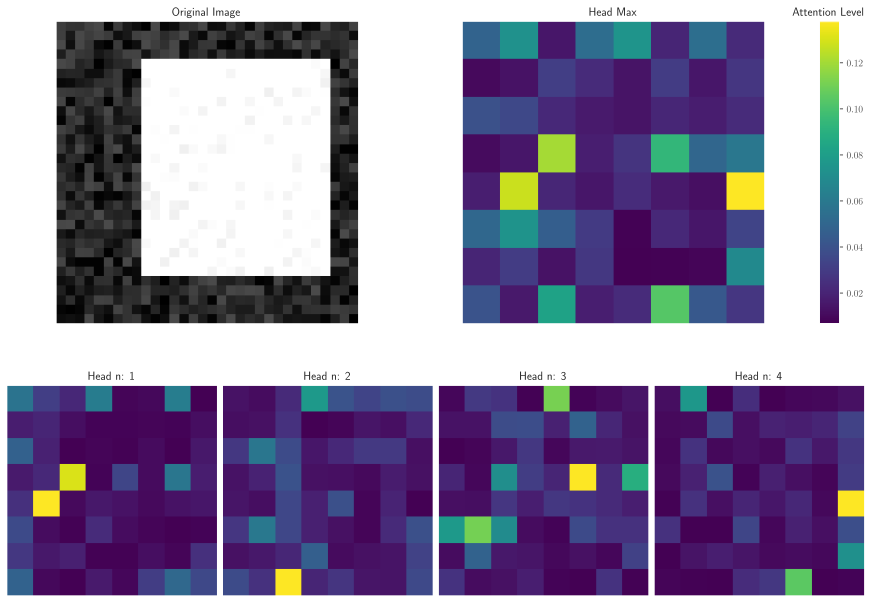

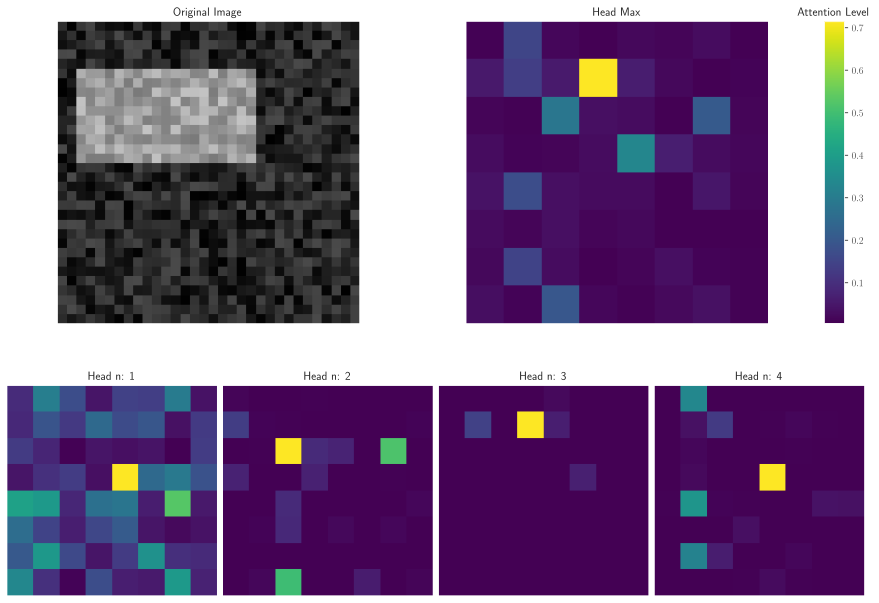

In [26]:
visualizer = Visualizer(model=transf, patch_size=4)

with torch.no_grad():
    for i, (data_, label_) in enumerate(test_dataloader, 0):
        data_ = data_.to(device)
        label_ = label_.to(device)

        visualizer.visualize_predict(data_)

        if i == 2:
            break


<div style="background-color:rgba(255, 255, 255, 1); text-align:center; vertical-align: middle; padding:40px 0;">

#### <span style="color:blue"> Example.</span>

<table><tr>
<td> <img src="img/example_viz_att_square.svg" alt="Drawing" style="width: 800px;"/> </td>
<td> <img src="img/example_viz_att_circle.svg" alt="Drawing" style="width: 800px;"/> </td>
</tr></table>